<a href="https://colab.research.google.com/github/konstantinosPapado/Water_Potability-ML/blob/main/Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 2 - Decision Trees and Random Forest

Importing Necessary Libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Load the dataset and describe it.

In [3]:
df = pd.read_csv('water_potability.csv')
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Plotting the histograms for all columns.

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

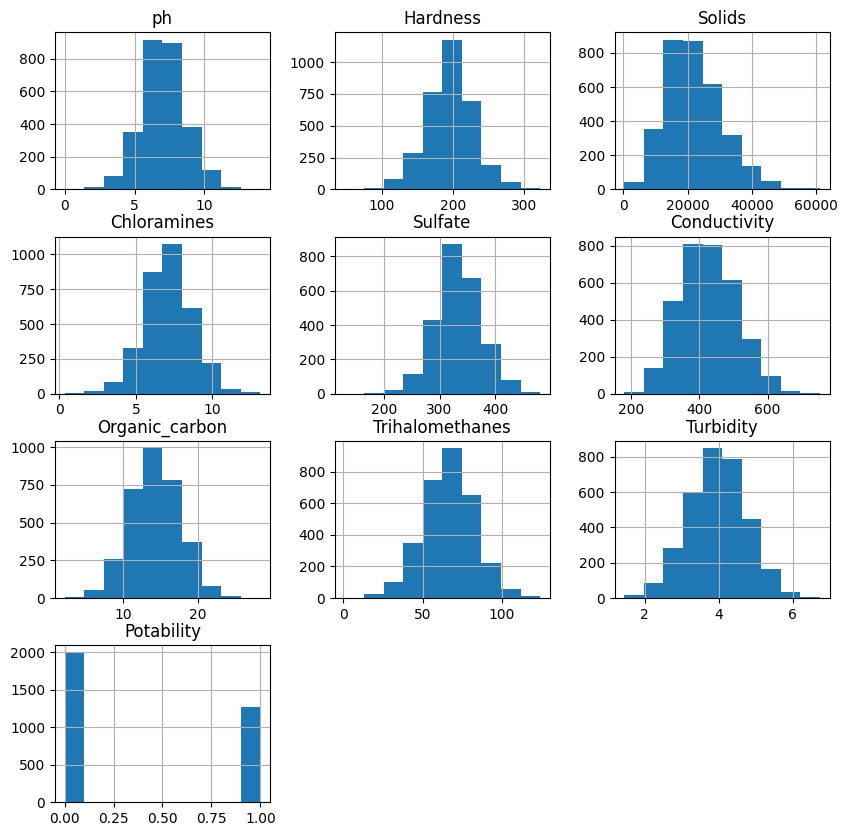

In [4]:
df.hist(column = [f for f in df.columns ], figsize=(10, 10))

Plotting the "Potability" using bar plots

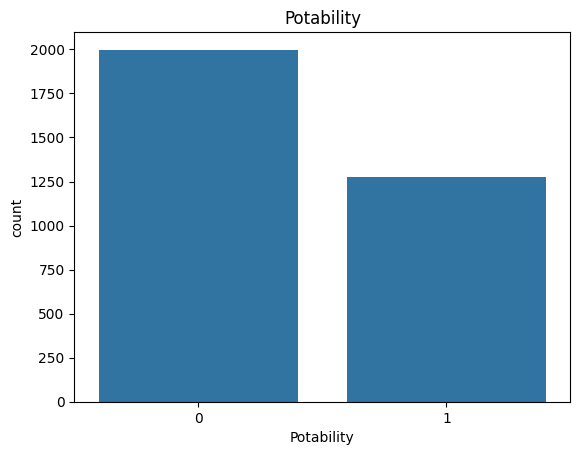

In [6]:
sns.countplot(x = 'Potability', data = df)
plt.title('Potability')
plt.show()

Based on the histograms, we see normal distribution for all columns except "Potability". It is clear that "Potability" is quite unbalanced, which can cause many issues in the ML models, as they might tend to predict the class that is most common.

In [7]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Our, data have null values, more specifically "ph" has 491 missing values, "Sulfate" has 781, and "Trihalomethanes" has 162.

In [14]:
percent_value_0 = (df['Potability'] == 0).sum()/df.shape[0]
print(percent_value_0*100)
percent_value_1 = (df['Potability'] == 1).sum()/df.shape[0]
print(percent_value_1*100)

60.98901098901099
39.010989010989015


So, the class '0' is seen 61% and the class '1' 39%.

The overall image of the dataset seems positive, normal distributions are really common most of the times, but since we plan to develop Tree-based models they might not have that much of a positive impact. But, the dataset has two main issues, the many missing values of its features, so that is one challenge to be adressed and the second issue is that the classes of the target value are unbalanced, so the models might predict the most common class most of the times, failing to learn the relationship with the other, less seen class.

In [21]:
df_6_5 = df[df["ph"] < 6.5]
df_between = df[(df["ph"] >= 6.5) & (df["ph"] <= 8.5)]
df_8_5 = df[df["ph"] > 8.5]

In [26]:
print(df_6_5.shape[0])
print(df_between.shape[0])
print(df_8_5.shape[0])

968
1328
489


We will calculate the percentages of Potability for the different df that we created to see if they match WHO, that says that water ph should be between 6.5 and 8.5 in order for it to be considered potable.

In [31]:
print("ph below 6.5")
percent_value_0 = (df_6_5['Potability'] == 0).sum()/df_6_5.shape[0]
print(percent_value_0*100)
percent_value_1 = (df_6_5['Potability'] == 1).sum()/df_6_5.shape[0]
print(percent_value_1*100)

ph below 6.5
63.22314049586777
36.77685950413223


In [32]:
print("ph between 6.5 and 8.5")
percent_value_0 = (df_between['Potability'] == 0).sum()/df_between.shape[0]
print(percent_value_0*100)
percent_value_1 = (df_between['Potability'] == 1).sum()/df_between.shape[0]
print(percent_value_1*100)

ph between 6.5 and 8.5
56.09939759036144
43.90060240963856


In [33]:
print("ph above 8.5")
percent_value_0 = (df_8_5['Potability'] == 0).sum()/df_8_5.shape[0]
print(percent_value_0*100)
percent_value_1 = (df_8_5['Potability'] == 1).sum()/df_8_5.shape[0]
print(percent_value_1*100)

ph above 8.5
66.87116564417178
33.12883435582822


Based on the results, it is clear that the data do not match the recomendations of WHO, this is another sign that the dataset is not good.

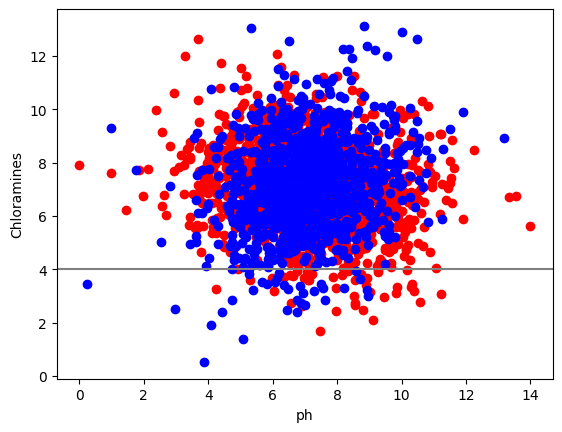

In [45]:
plt.scatter(df[df["Potability"]==0]['ph'],df[df["Potability"]==0]['Chloramines'],c = "red")
plt.scatter(df[df["Potability"]==1]['ph'],df[df["Potability"]==1]['Chloramines'],c = "blue")
plt.xlabel("ph")
plt.ylabel("Chloramines")
plt.axhline(4,color = 'gray')
plt.show()

Based on the image, the recommandation of WHO that Chloramines should be below 4 ppm in order for the water to be potable is not true in this dataset. Another indication of poor data quality.

Filling the NaN values with -1

In [46]:
df = df.fillna(-1)

Creation of X, y and splitting to train and test.

In [48]:
X = df.drop(["Potability"], axis = 'columns').to_numpy()
y = df["Potability"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


Creation and training of a Decision Tree Classifier.

In [50]:
dectree = tree.DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred = dectree.predict(X_test)
print("The accuracy in X_test ", accuracy_score(y_test, y_pred))

The accuracy in X_test  0.5839267548321465


In [53]:
y_pred = dectree.predict(X_train)
print("The accuracy in X_train ", accuracy_score(y_train, y_pred))

The accuracy in X_train  1.0


It is evident that the accuracy of the model for the train set is perfect 100%, but in the test set is 58%, so that indicates overfitting of the model to the train set.

Hyperparameters

In [59]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits=[2,5]
min_samples_leafs = [1,2]
max_feat=[None,'sqrt']
ccp=[0,0.01]

In [69]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
results=[]
for criterion in criteria:
  for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
      for min_samples_leaf in min_samples_leafs:
        for max_features in max_feat:
          for cp in ccp:
            model = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,max_features= max_features, random_state=0)
            model.fit(X_train, y_train)
            train_acc = accuracy_score(y_train, model.predict(X_train))
            test_acc = accuracy_score(y_test, model.predict(X_test))
            results.append([criterion, max_depth, min_samples_split, min_samples_leaf, max_features, cp, train_acc, test_acc])
results_df=pd.DataFrame(results, columns = ['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'ccp', 'train_acc', 'test_acc'])
print(results_df.sort_values(by='test_acc', ascending=False))

   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
40      gini        5.0                  5                 1         None   
41      gini        5.0                  5                 1         None   
45      gini        5.0                  5                 2         None   
44      gini        5.0                  5                 2         None   
36      gini        5.0                  2                 2         None   
37      gini        5.0                  2                 2         None   
33      gini        5.0                  2                 1         None   
32      gini        5.0                  2                 1         None   
94   entropy        5.0                  5                 2         sqrt   
95   entropy        5.0                  5                 2         sqrt   
87   entropy        5.0                  2                 2         sqrt   
86   entropy        5.0                  2                 2         sqrt   

We want the best perfoming model in the test set with max_depth = 3.

In [70]:
finalmodel = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, min_samples_leaf=1,max_features= None, ccp_alpha=0, random_state=0)
finalmodel.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=3,
                       min_samples_split=5, random_state=0)

[Text(0.4583333333333333, 0.875, 'Sulfate <= 409.753\nsamples = 2293\nvalue = [1388, 905]\nclass = 0'),
 Text(0.25, 0.625, 'Chloramines <= 12.145\nsamples = 2230\nvalue = [1366, 864]\nclass = 0'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'Hardness <= 99.615\nsamples = 2223\nvalue = [1366.0, 857.0]\nclass = 0'),
 Text(0.08333333333333333, 0.125, 'samples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.25, 0.125, 'samples = 2217\nvalue = [1366, 851]\nclass = 0'),
 Text(0.3333333333333333, 0.375, 'samples = 7\nvalue = [0, 7]\nclass = 1'),
 Text(0.6666666666666666, 0.625, 'Conductivity <= 408.749\nsamples = 63\nvalue = [22, 41]\nclass = 1'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'Hardness <= 249.253\nsamples = 34\nvalue = [5, 29]\nclass = 1'),
 Text(0.4166666666666667, 0.125, 'samples = 32\nvalue = [3, 29]\nclass = 1'),
 Text(0.5833333333333334, 0.125, 'samples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.8333333333333334, 0.375, 'Solids <= 15471.063

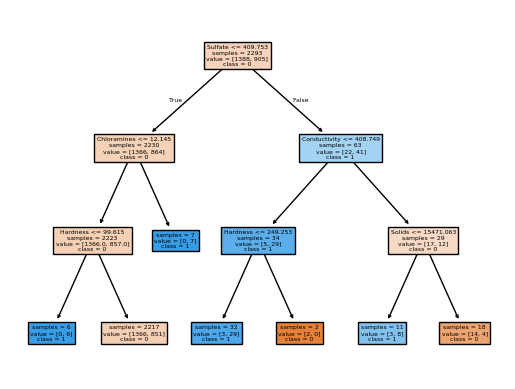

In [78]:
tree.plot_tree(finalmodel, feature_names=df.columns[:-1], filled=True, impurity = False, class_names= ['0','1'])

In [85]:
pd.set_option('display.max_rows', 1)

print(tree.export_text(finalmodel, feature_names=df.columns[:-1]))

|--- Sulfate <= 409.75
|   |--- Chloramines <= 12.14
|   |   |--- Hardness <= 99.61
|   |   |   |--- class: 1
|   |   |--- Hardness >  99.61
|   |   |   |--- class: 0
|   |--- Chloramines >  12.14
|   |   |--- class: 1
|--- Sulfate >  409.75
|   |--- Conductivity <= 408.75
|   |   |--- Hardness <= 249.25
|   |   |   |--- class: 1
|   |   |--- Hardness >  249.25
|   |   |   |--- class: 0
|   |--- Conductivity >  408.75
|   |   |--- Solids <= 15471.06
|   |   |   |--- class: 1
|   |   |--- Solids >  15471.06
|   |   |   |--- class: 0



The best performing model overall.

In [86]:
finalmodel = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, min_samples_leaf=1,max_features= None, ccp_alpha=0, random_state=0)
finalmodel.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_split=5,
                       random_state=0)

[Text(0.5460526315789473, 0.9166666666666666, 'Sulfate <= 409.753\nsamples = 2293\nvalue = [1388, 905]\nclass = 0'),
 Text(0.2894736842105263, 0.75, 'Sulfate <= 301.782\nsamples = 2230\nvalue = [1366, 864]\nclass = 0'),
 Text(0.41776315789473684, 0.8333333333333333, 'True  '),
 Text(0.14473684210526316, 0.5833333333333334, 'Sulfate <= 64.0\nsamples = 913\nvalue = [521, 392]\nclass = 0'),
 Text(0.07894736842105263, 0.4166666666666667, 'Turbidity <= 5.631\nsamples = 540\nvalue = [341, 199]\nclass = 0'),
 Text(0.05263157894736842, 0.25, 'ph <= 9.296\nsamples = 535\nvalue = [341, 194]\nclass = 0'),
 Text(0.02631578947368421, 0.08333333333333333, 'samples = 500\nvalue = [311, 189]\nclass = 0'),
 Text(0.07894736842105263, 0.08333333333333333, 'samples = 35\nvalue = [30, 5]\nclass = 0'),
 Text(0.10526315789473684, 0.25, 'samples = 5\nvalue = [0, 5]\nclass = 1'),
 Text(0.21052631578947367, 0.4166666666666667, 'Solids <= 27754.946\nsamples = 373\nvalue = [180, 193]\nclass = 1'),
 Text(0.1578947

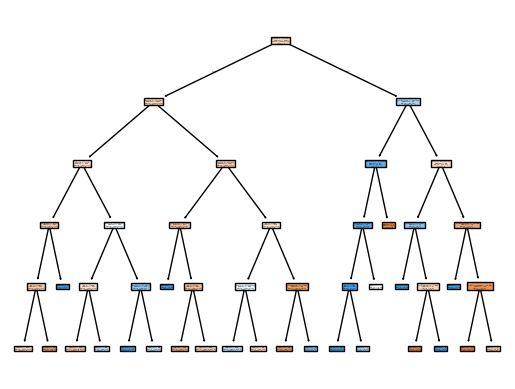

In [88]:
tree.plot_tree(finalmodel, feature_names=df.columns[:-1], filled=True, impurity = False, class_names= ['0','1'])

In [87]:
print(tree.export_text(finalmodel, feature_names=df.columns[:-1]))

|--- Sulfate <= 409.75
|   |--- Sulfate <= 301.78
|   |   |--- Sulfate <= 64.00
|   |   |   |--- Turbidity <= 5.63
|   |   |   |   |--- ph <= 9.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ph >  9.30
|   |   |   |   |   |--- class: 0
|   |   |   |--- Turbidity >  5.63
|   |   |   |   |--- class: 1
|   |   |--- Sulfate >  64.00
|   |   |   |--- Solids <= 27754.95
|   |   |   |   |--- ph <= 7.31
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ph >  7.31
|   |   |   |   |   |--- class: 1
|   |   |   |--- Solids >  27754.95
|   |   |   |   |--- Sulfate <= 259.07
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Sulfate >  259.07
|   |   |   |   |   |--- class: 1
|   |--- Sulfate >  301.78
|   |   |--- Sulfate <= 363.35
|   |   |   |--- Hardness <= 116.30
|   |   |   |   |--- class: 1
|   |   |   |--- Hardness >  116.30
|   |   |   |   |--- ph <= 5.71
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ph >  5.71
|   |   |   |   |   |--- class: 0
|   |   |--- Sul

<Axes: >

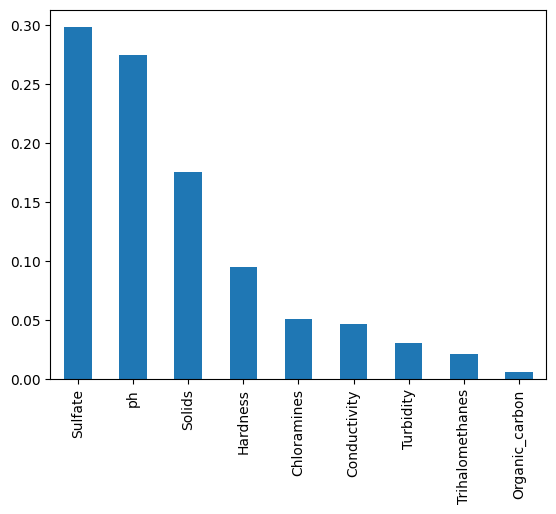

In [90]:
importance = finalmodel.feature_importances_
feature_importances = pd.Series(importance,index=df.columns[:-1] )
feature_importances =feature_importances.sort_values(ascending=False)
feature_importances.plot( kind='bar')

Based on the final Decision Tree, the most important features  are "Sulfate", "ph, "Solids", "Hardness", "Chloramines", so if there was a need for using only 5 metrics, these would be the ones.

A Random Forest Classifier might work better since it is harder to overfit than a simple decision tree, while also its feature randomization helps in prevent the model on relying on a single/or set of features for its predictions.

In [95]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits=[2,5]
min_samples_leafs = [1,2]
max_feat=[None,'sqrt']
ccp=[0,0.01]
n_estimators = [50,100,200]
results=[]
for criterion in criteria:
  for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
      for min_samples_leaf in min_samples_leafs:
        for max_features in max_feat:
          for cp in ccp:
            for n in n_estimators:
              rf = RandomForestClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,max_features= max_features,n_estimators=n, random_state=0)
              rf.fit(X_train, y_train)
              train_acc = accuracy_score(y_train, rf.predict(X_train))
              test_acc = accuracy_score(y_test, rf.predict(X_test))
              results.append([criterion, max_depth, min_samples_split, min_samples_leaf, max_features, cp, n,train_acc, test_acc])
results_df=pd.DataFrame(results, columns = ['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'ccp','estimators', 'train_acc', 'test_acc'])
print(results_df.sort_values(by='test_acc', ascending=False))


    criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
20       gini        NaN                  2                 2         sqrt   
23       gini        NaN                  2                 2         sqrt   
47       gini        NaN                  5                 2         sqrt   
44       gini        NaN                  5                 2         sqrt   
35       gini        NaN                  5                 1         sqrt   
32       gini        NaN                  5                 1         sqrt   
175   entropy        NaN                  5                 1         sqrt   
178   entropy        NaN                  5                 1         sqrt   
46       gini        NaN                  5                 2         sqrt   
43       gini        NaN                  5                 2         sqrt   
179   entropy        NaN                  5                 1         sqrt   
176   entropy        NaN                  5                 1   

The most important part for a classifier in this type of problem is to correctly predict when the water is unsafe to drink. So, false predictions that the water is safe play a more important role than the other predictions and the focus should be there.

Since a Decision Tree classifier is a more interpretable model by-design, companies might prefer this model rather than a Random Forest, cause the decision tree will be safer in terms of law etc.